# Proyek Analisis Data: [Bike Dataset Analysis]
- **Nama:** [Muhammad Gemilang Ramahan]
- **Email:** [gemilangramadhan000@gmail.com]
- **Email Bangkit:** [m004b4ky2856@bangkit.academy]
- **ID Dicoding:** [gemilang_ramadhan]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap penyewaan sepeda dalam musim yang berbeda?

- Apakah ada peristiwa (seperti hari libur atau kondisi cuaca ekstrem) yang secara signifikan memengaruhi jumlah penyewaan sepeda, dan bagaimana peristiwa ini berkorelasi dengan peningkatan atau penurunan penggunaan?

- Pada musim apakah para penyewa sepeda memiliki antusias yang paling tinggi? Dan pada jam berapa yang termasuk peak hours pada kondisi antusiasme tersebut


## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import streamlit as st # type: ignore

# Dataset characteristics
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv	
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Gathering Data

In [42]:
# Load datasets
day_df = pd.read_csv('./data/bike/day.csv')
hour_df = pd.read_csv('./data/bike/hour.csv')

In [43]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [44]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan data na/null
- tipe data sudah sesuai dengan apa yang diinginkan

### Assessing Data

In [45]:
# Check missing values
print("Missing values in day_df:")
print(day_df.isnull().sum())
print("\nMissing values in hour_df:")
print(hour_df.isnull().sum())

Missing values in day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [46]:
# Check duplicates
print("\nDuplicate entries in day_df:", day_df.duplicated().sum())
print("Duplicate entries in hour_df:", hour_df.duplicated().sum())



Duplicate entries in day_df: 0
Duplicate entries in hour_df: 0


In [47]:
# Check data types
print("\nData types in day_df:")
print(day_df.dtypes)
print("\nData types in hour_df:")
print(hour_df.dtypes)


Data types in day_df:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Data types in hour_df:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


**Insight:**
- Tidak ada duplikasi
- Tidak ada data yang perlu di fill

## Exploratory Data Analysis (EDA)

### Analisis data yang telah di dapatkan

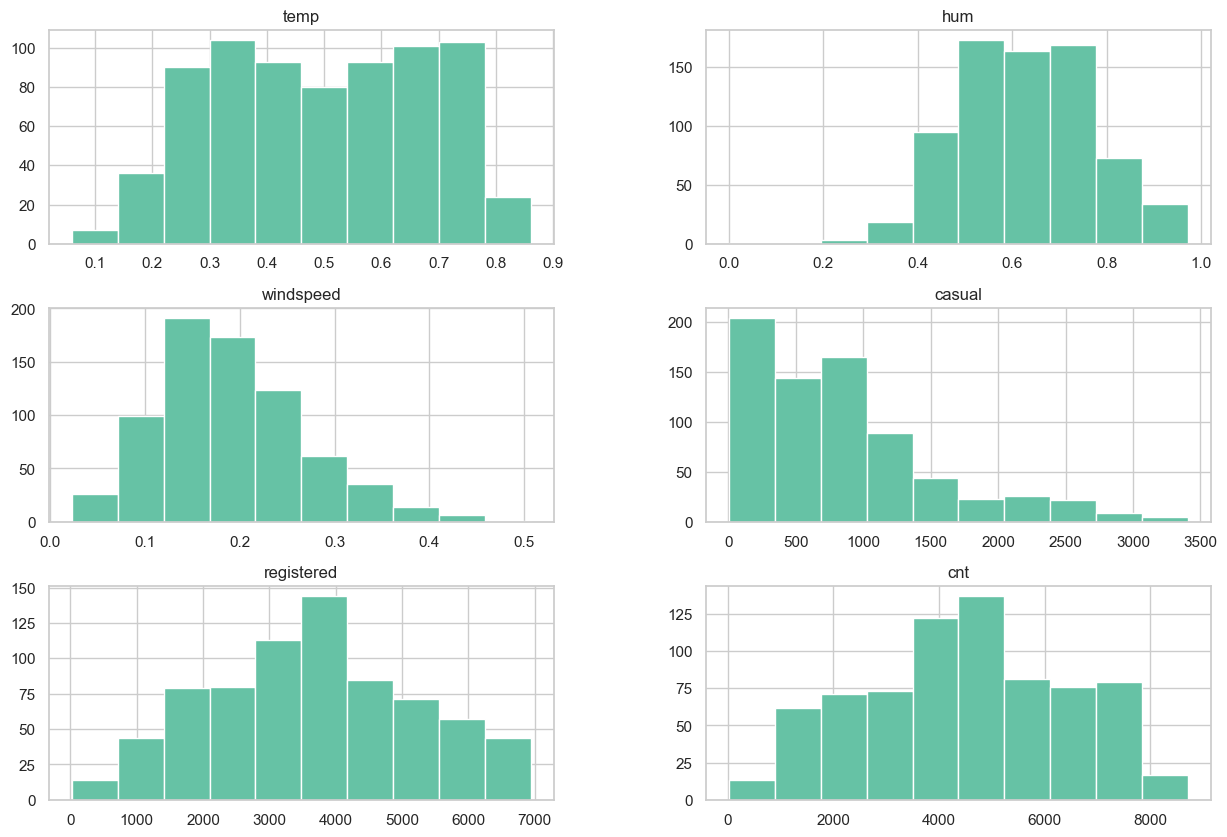

In [48]:
numerical_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Histograms
day_df[numerical_cols].hist(figsize=(15, 10))
plt.show()

**Insight:**
- Variabel `cnt` (total penyewaan) menunjukkan distribusi right-skewed.
- temperature dan humidity sudah terdistribusi normal.
- chart kecepatan angin memiliki karakteristik distribusi left-skewed.

### Analisis Variabel

In [49]:
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")

weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds',
    3: 'Light Snow, Light Rain + Thunderstorm',
    4: 'Heavy Rain, Snow + Fog'
}

# Pembuatan variable yang diperlukan
day_df['weather_desc'] = day_df['weathersit'].map(weather_labels)
hour_df['weather_desc'] = hour_df['weathersit'].map(weather_labels)


season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season_desc'] = day_df['season'].map(season_labels)

# Grouping Data as needed
grouped_data = day_df.groupby(['season_desc', 'weather_desc'])['cnt'].mean().reset_index()
grouped_hour_data = hour_df.groupby(['holiday', 'weather_desc'])['cnt'].mean().reset_index()
hourly_peak_data = hour_df.groupby('hr')['cnt'].mean().reset_index()


**Insight:**
- Melakukan variable assessing untuk digunakan pada plotting.
- Grouping data dilakukan untuk melihat tren yang dihasilkan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

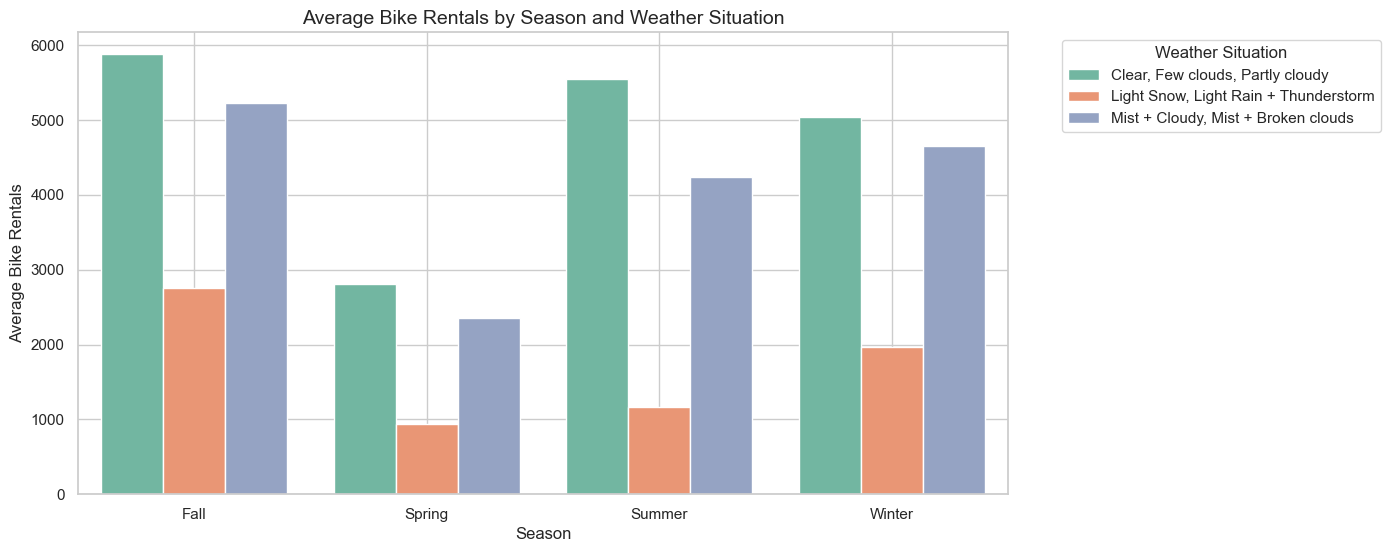

In [50]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

plt.figure(figsize=(12, 6))

sns.barplot(data=grouped_data, x='season_desc', y='cnt', hue='weather_desc')

plt.title('Average Bike Rentals by Season and Weather Situation', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend(title='Weather Situation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Pertanyaan 2:

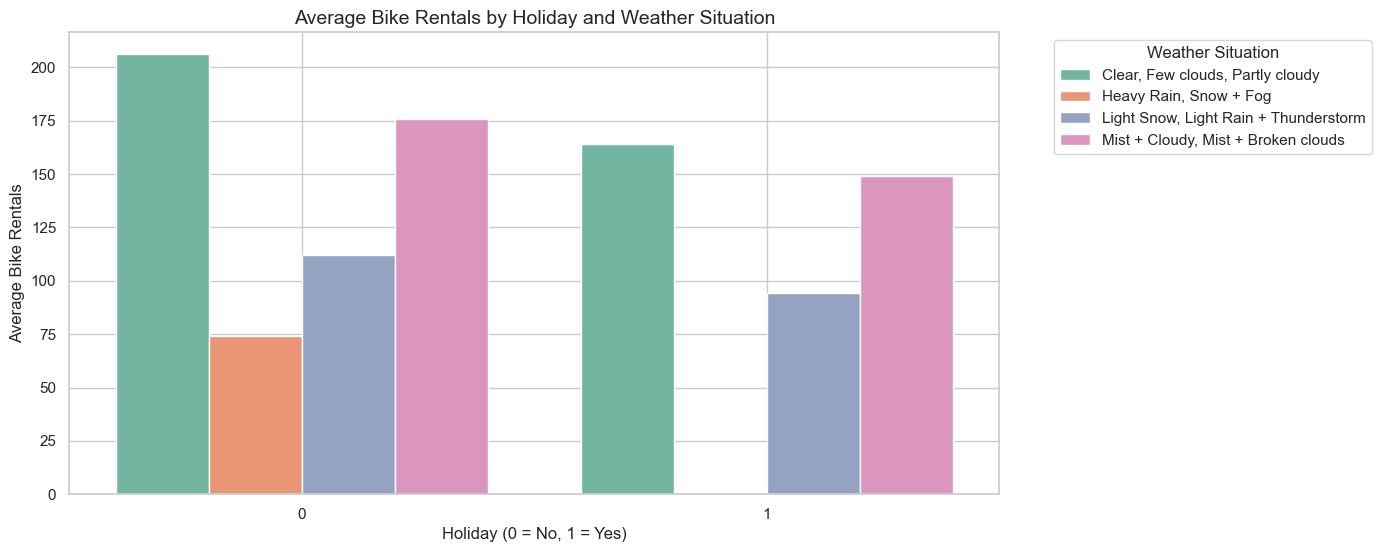

In [51]:
plt.figure(figsize=(12, 6))

sns.barplot(data=grouped_hour_data, x='holiday', y='cnt', hue='weather_desc')

plt.title('Average Bike Rentals by Holiday and Weather Situation', fontsize=14)
plt.xlabel('Holiday (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.legend(title='Weather Situation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Pertanyaan 3

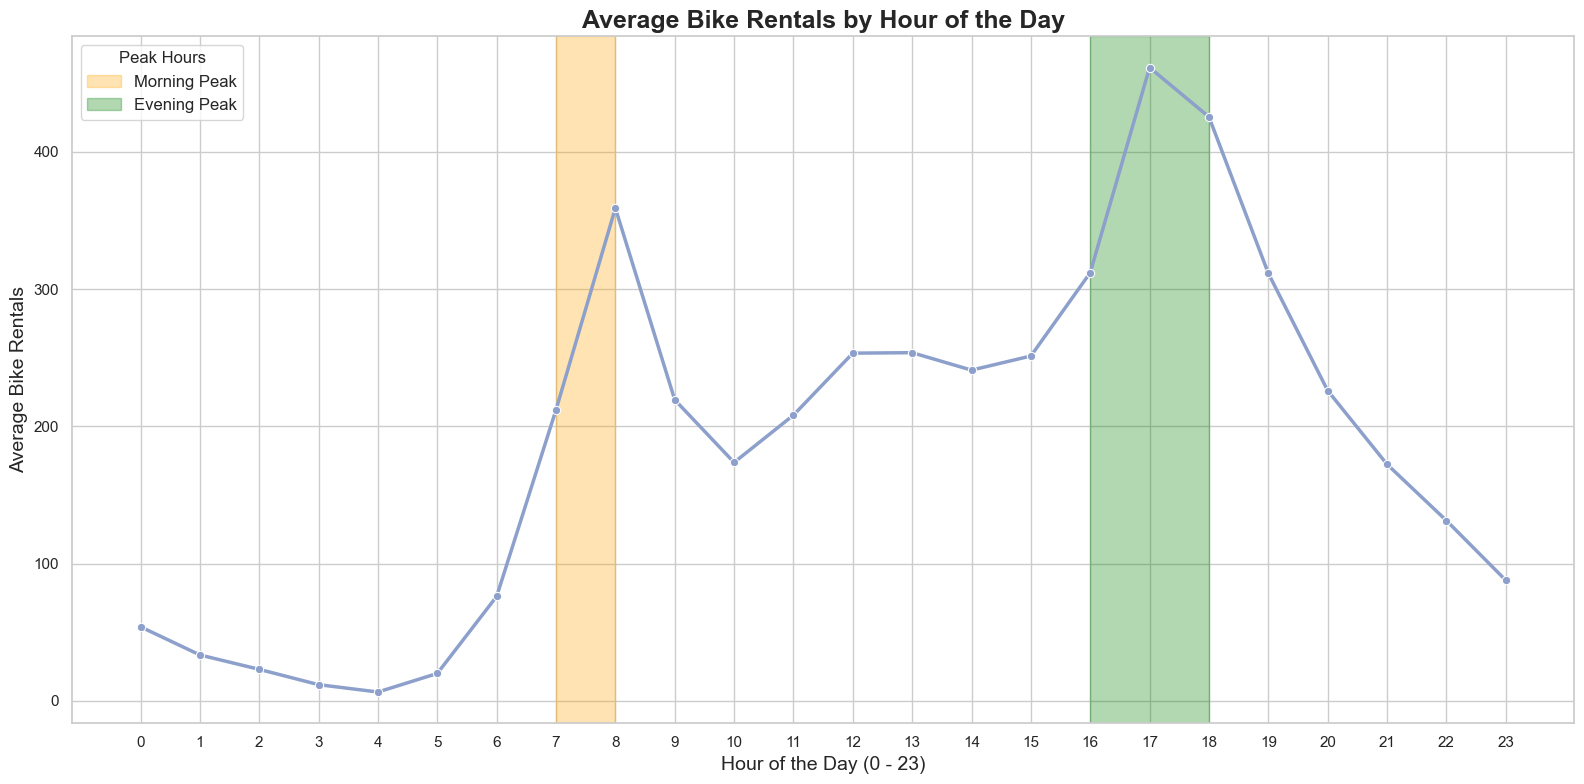

In [52]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    data=hourly_peak_data, 
    x='hr', 
    y='cnt', 
    marker='o', 
    color=custom_palette[2], 
    linewidth=2.5, 
    ax=ax
)

ax.set_title('Average Bike Rentals by Hour of the Day', fontsize=18, weight='bold')
ax.set_xlabel('Hour of the Day (0 - 23)', fontsize=14)
ax.set_ylabel('Average Bike Rentals', fontsize=14)
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
ax.axvspan(7, 8, color='orange', alpha=0.3, label='Morning Peak')
ax.axvspan(16, 18, color='green', alpha=0.3, label='Evening Peak')
ax.legend(title='Peak Hours', loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

# Analisis Lanjutan

**Untuk memberikan informasi yang lebih lanjut, saya ingin membandingkan casual user dan registered user untuk mengetahui perbandingan total penyewaan sepeda dari semua total data**

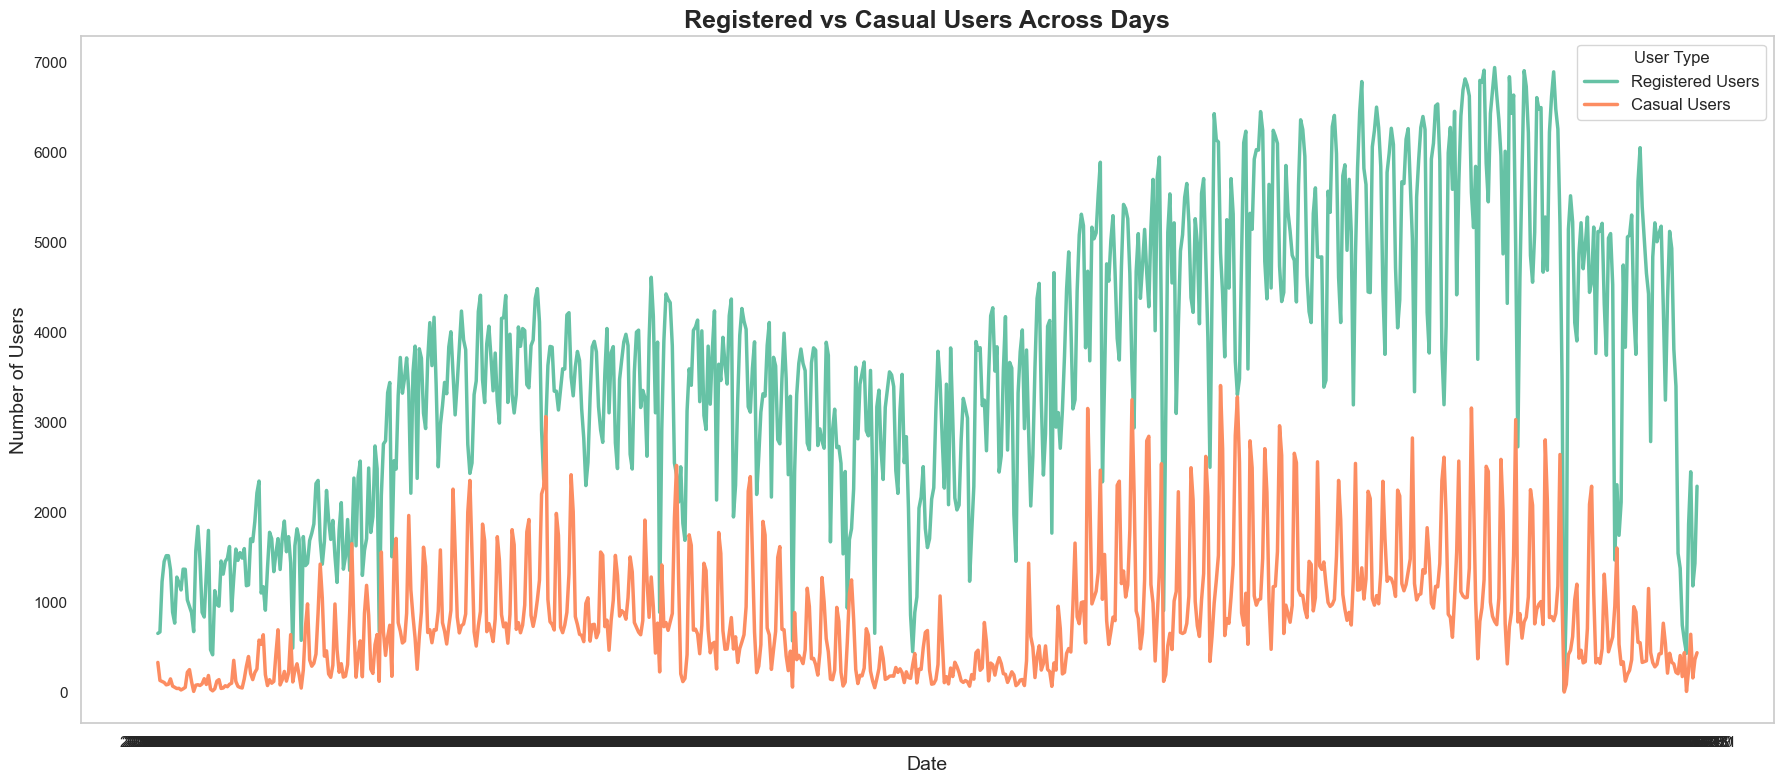

In [53]:
fig, ax = plt.subplots(figsize=(18, 8))

sns.lineplot(
    data=day_df, 
    x='dteday', 
    y='registered', 
    label='Registered Users', 
    color=custom_palette[0], 
    linewidth=2.5, 
    ax=ax
)
sns.lineplot(
    data=day_df, 
    x='dteday', 
    y='casual', 
    label='Casual Users', 
    color=custom_palette[1], 
    linewidth=2.5, 
    ax=ax
)

ax.set_title('Registered vs Casual Users Across Days', fontsize=18, weight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Users', fontsize=14)
ax.legend(title='User Type', fontsize=12, title_fontsize=12)
plt.grid(False)
plt.tight_layout()

plt.show()

### Melakukan Clustering untuk melihat perbandingan Casual Users dan Registered Users

In [54]:
# fungsi untuk melakukan clustering
def categorize_users(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    
    def categorize(value):
        if value < q1:
            return 'Low'
        elif value >= q1 and value <= q3:
            return 'Medium'
        else:
            return 'High'
    
    return data[column].apply(categorize)


**Insight:**
- melakukan perhitungan nilai Q1 dan Q3 untuk mendapatkan nilai interquartil untuk melakukan clustering

In [59]:
# Clustering untuk Casual Users
day_df['casual_cluster'] = categorize_users(day_df, 'casual')


In [60]:

# Clustering untuk Registered Users
day_df['registered_cluster'] = categorize_users(day_df, 'registered')


In [61]:

# hasil clustering
print(day_df[['casual', 'casual_cluster', 'registered', 'registered_cluster']].head())


   casual casual_cluster  registered registered_cluster
0     331         Medium         654                Low
1     131            Low         670                Low
2     120            Low        1229                Low
3     108            Low        1454                Low
4      82            Low        1518                Low


**Melakukan pengkategorian user pada Casual Users dan Registered Users**
- `Low`: Jumlah penyewaan yang berada di bawah kuartil pertama (Q1).
- `Medium`: Jumlah penyewaan yang berada di antara kuartil pertama (Q1) dan kuartil ketiga (Q3).
- `High`: Jumlah penyewaan yang berada di atas kuartil ketiga (Q3).

C:\Users\Gemilang\AppData\Local\Temp\ipykernel_31264\1539639866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='casual_cluster', palette=custom_palette, edgecolor='white')
C:\Users\Gemilang\AppData\Local\Temp\ipykernel_31264\1539639866.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=day_df, x='casual_cluster', palette=custom_palette, edgecolor='white')


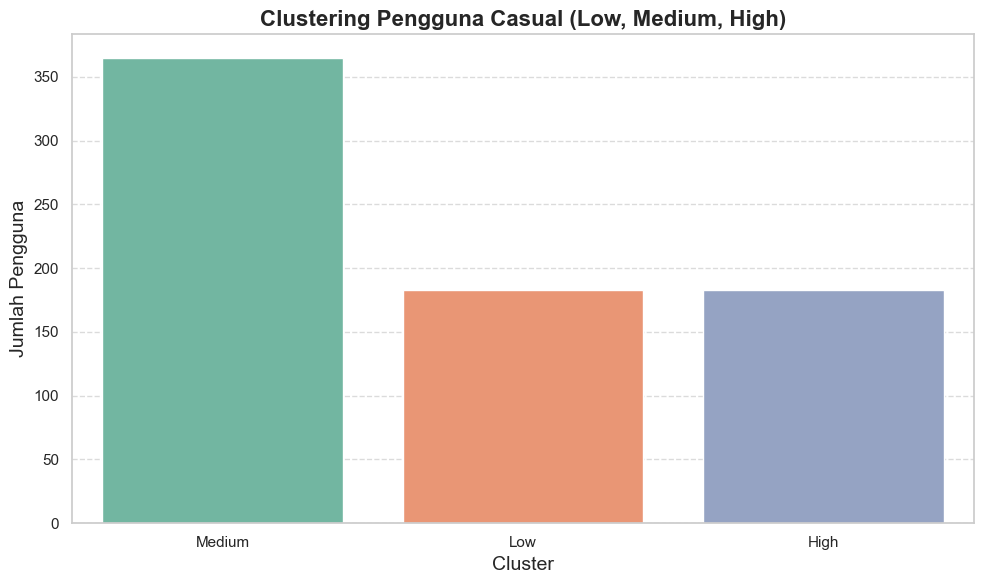

In [63]:
# Visualisasi Clustering Pengguna Casual
plt.figure(figsize=(10, 6))
sns.countplot(data=day_df, x='casual_cluster', palette=custom_palette, edgecolor='white')
plt.title('Clustering Pengguna Casual (Low, Medium, High)', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Gemilang\AppData\Local\Temp\ipykernel_31264\2301194311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='registered_cluster', palette=custom_palette, edgecolor='white')
C:\Users\Gemilang\AppData\Local\Temp\ipykernel_31264\2301194311.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=day_df, x='registered_cluster', palette=custom_palette, edgecolor='white')


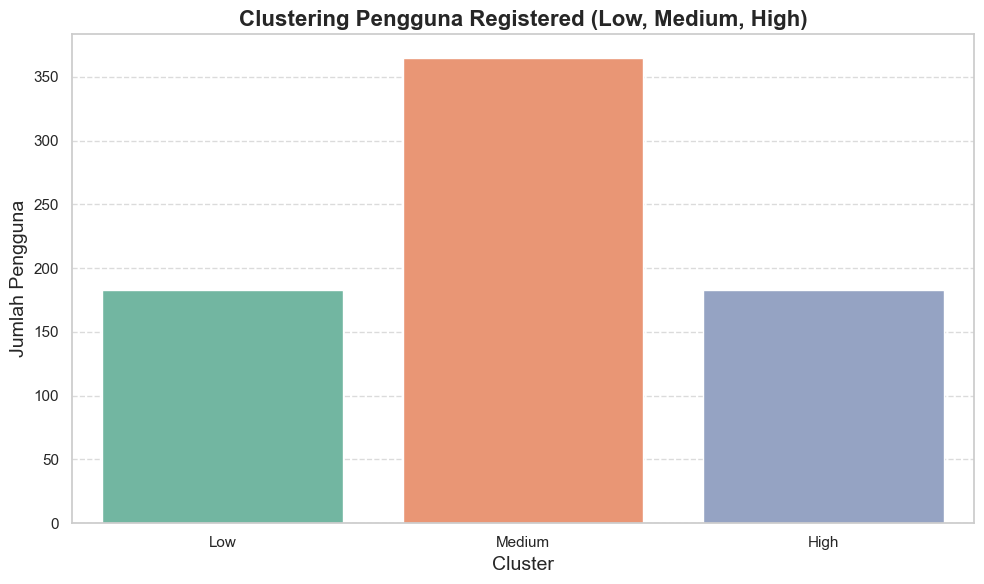

In [64]:

# Visualisasi Clustering Pengguna Registered
plt.figure(figsize=(10, 6))
sns.countplot(data=day_df, x='registered_cluster', palette=custom_palette, edgecolor='white')
plt.title('Clustering Pengguna Registered (Low, Medium, High)', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Insight/Conclusion:
## Insight Question 1
- Cuaca ekstrem seperti hujan lebat atau salju ringan (Light Snow, Light Rain + Thunderstorm) memiliki dampak negatif terhadap penyewaan sepeda di setiap musim.

- Musim gugur memiliki tingkat penyewaan yang paling tinggi, terkhususnya pada saat kondisi cuaca yang cerah (Clear, Few clouds, Partly cloudy)

## Insight Question 2
- Penyewaan sepeda cenderung lebih banyak pada saat hari biasa. Hipotesa pribadi saya adalah, karena pada saat hari libur, orang-orang cenderung membawa kendaraan mobil pribadi untuk liburan bersama keluarga.

## Insight Question 3
- Peak hours terjadi sekitar pukul 07:00-08:00 dan 16:00-18:00, kemungkinan karena itu adalah jam-jam masuk kerja dan pulang kerja.

## Insight Analisis Lanjutan
- Pengguna yang teregistrasi secara konstan selalu menggunakan jasa penyewaan sepeda lebih banyak daripada orang yang hanya menyewa secara casual.
